# Importing  libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing train_test_split

In [2]:
from sklearn.model_selection import train_test_split

# Loading dataset

In [3]:
df = pd.read_csv("titanic_toy.csv")
df.sample(5)

,Age,Fare,Family,Survived
139,24.0,79.2000,0,0
237,8.0,26.2500,2,1
133,29.0,NaN,1,1
483,63.0,9.5875,0,1
605,36.0,15.5500,1,0


# Displaying concise information about a DataFrame

Also include the data types of columns, the number of non-null values, and memory usage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


# Handling missing value

In [5]:
# Checking the percentage of data missing in each column

df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
# Storing all the input columns in variable 'X' and target column in variable 'y'

X = df.drop(columns=["Survived"])
y = df['Survived']

In [7]:
#  Dividing dataset into two subsets: one for training the model (X_train, y_train) and the other for testing its 
# performance (y_train, y_test), helping evaluate how well the model generalizes to new unseen data.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
# Shape of training and testing data

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [9]:
# Percentage of missing data of input columns in training dataset

X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [10]:
# Define a function to generate random values for missing data
def fill_random(row, mean, std):
    if pd.isna(row):
        return np.random.normal(mean, std)
    else:
        return row
    
# Here, I defined a custom function fill_random(row, mean, std) that takes a row, mean, and standard deviation as inputs. 
# Inside this function, if the value in the row is missing (NaN), it fills it with a random value generated from a 
# normal distribution with the specified mean and standard deviation. If the value is not missing, it leaves it unchanged.

In [11]:
# Defining mean and standard deviation for random value
mean_age = X_train['Age'].mean()
std_age = X_train['Age'].std()

# Applying the function to create new columns with random values
X_train['Age_random'] = X_train['Age'].apply(lambda x: fill_random(x, mean_age, std_age))

In [12]:
# Defining mean and standard deviation for random values
mean_fare = X_train['Fare'].mean()
std_fare = X_train['Fare'].std()

# Applying the function to create new columns with random value
X_train['Fare_random'] = X_train['Fare'].apply(lambda x: fill_random(x, mean_fare, std_fare))

In [13]:
X_train.sample(5)

,Age,Fare,Family,Age_random,Fare_random
434,50.0,NaN,1,50.000000,36.439194
270,NaN,31.0000,0,38.577373,31.000000
847,35.0,7.8958,0,35.000000,7.895800
314,43.0,26.2500,2,43.000000,26.250000
674,NaN,0.0000,0,43.601071,0.000000


# Examing variance

In [14]:
# When using random value to replace missing values in a dataset, this can impact downstream analyses or modeling.
# FOr that, we are calculating the variance. We check whether the variance of the imputed dataset has significantly  
# changed as compared to the original dataset.

print("Original Age variable variance : ", X_train['Age'].var())
print("Age variance after imputating random value : ", X_train['Age_random'].var())

print("\n")


print("Original Fare variable variance : ", X_train['Fare'].var())
print("Fare variance after imputating random value : ", X_train['Fare_random'].var())

Original Age variable variance :  204.3495133904614
Age variance after imputating random value :  204.56294381490918


Original Fare variable variance :  2448.197913706318
Fare variance after imputating random value :  2467.6899245645695


As we observe, the variance is not changing much in this columns, which is a green flag.

# Examining distribution

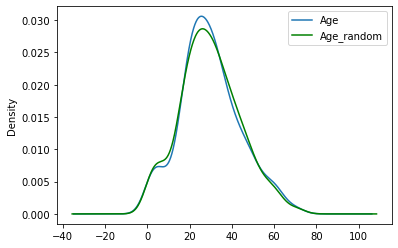

In [15]:
# Now, let's examine the distribution of the original column 'Age' and the 'Age_random' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with random value
X_train['Age_random'].plot(kind='kde', ax=ax, color='green')

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

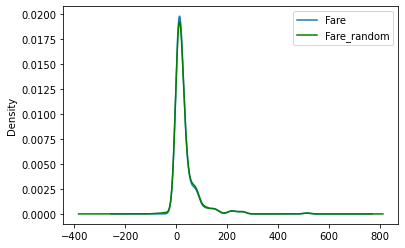

In [16]:
# Now, let's examine the distribution of the original column 'Fare', and the 'Fare_random' column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with random value
X_train['Fare_random'].plot(kind='kde', ax=ax, color='green')

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As we can see that in fare and age columns, distribution of the columns are almost same, which shows that we can fill missing values with the random values.

# Examining covariance

In [17]:
# We can also check covariance to determine whether the covariance of imputed columns with other columns is the same 
# as that of the original columns with other columns.

X_train.cov()

,Age,Fare,Family,Age_random,Fare_random
Age,204.349513,70.719262,-6.498901,204.349513,57.490428
Fare,70.719262,2448.197914,17.258917,61.103455,2448.197914
Family,-6.498901,17.258917,2.735252,-5.306952,17.332337
Age_random,204.349513,61.103455,-5.306952,204.562944,52.593645
Fare_random,57.490428,2448.197914,17.332337,52.593645,2467.689925


Significant changes in covariance are undesirable.

# Examining correlation

In [18]:
# We can also check correlation to determine whether the correlation of imputed columns with other columns is the 
# same as that of the original columns with other columns.

X_train.corr()

,Age,Fare,Family,Age_random,Fare_random
Age,1.000000,0.092644,-0.299113,1.000000,0.075727
Fare,0.092644,1.000000,0.208268,0.085989,1.000000
Family,-0.299113,0.208268,1.000000,-0.224354,0.210966
Age_random,1.000000,0.085989,-0.224354,1.000000,0.074024
Fare_random,0.075727,1.000000,0.210966,0.074024,1.000000


Since correlation values range only between -1 and 1, significant changes in correlation are also undesirable.

# Creating box plots to visualize changes between the original and imputed columns

<AxesSubplot:>

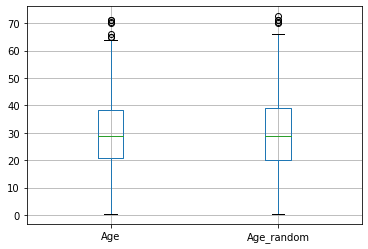

In [19]:
X_train[['Age', 'Age_random']].boxplot()

We can observe that there isn't a significant difference between the original columns and the imputed column, which is a positive indication.

<AxesSubplot:>

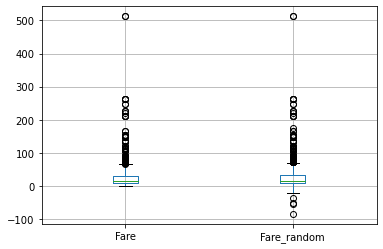

In [20]:
X_train[['Fare', 'Fare_random']].boxplot()

We can observe that there isn't a significant difference between the original columns and the imputed column, but in the imputed column outliers increased as compared to original column. Therefore, we need to exercise caution when imputing missing values and carefully select the optimal strategy.